<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Estadísticos de Orden

**Entrada:** Una secuencia $a$ de $n$ números $[a_1, a_2, \ldots, a_n]$ y un número $k$ **menor al tamaño de la secuencia**.

**Salida:** El $k$-ésimo **menor elemento** de la secuencia $a$.

Un estadístico de orden es el $k$-ésimo menor elemento de una muestra, y este es una de las herramientas mas importantes de la estadística no paramétrica y de inferencia, además de tener muchas aplicaciones en diversas áreas, como la **ingeniería** y **data science**.

En este informe, presentaremos el algoritmo **Select**, que es capaz de resolver el problema de encontrar un estadístico de orden en una muestra no ordenada en **tiempo lineal**.

# 2. Código
A continuación se mostrarán las implementaciones realizadas para cada algoritmo que se utilizó para resolver el problema de encontrar estadísticos de orden.

## 2.1 PivotSelection

Este algoritmo divide un arreglo $A$ en grupos de tamaño $5$, y calcula la mediana de estos grupos de forma recursiva. Es utilizado por **Select**, que utilizará esta mediana de medianas como un pivote para posteriormente particionar el arreglo y encontrar el $k$**-ésimo menor elemento**.
Para esto, se utilizan 4 algoritmos presentados a continuación.

### 2.1.1 Insertion Sort
Algoritmo de ordenamiento. Es utilizado por **Median**.

In [278]:
def insertion_sort(A, verbose=False):
  n = len(A)
  t = 0 # Contador de comparaciones
  for i in range(1, n):
    j = i # Variable auxiliar usada para recorrer el arreglo hacia atrás
    t += 1 # Se realiza la primera comparación
    # Si el elemento es menor al anterior se intercambian
    while A[j] < A[j - 1]:
      A[j], A[j - 1] = A[j - 1], A[j]
      j -= 1
      if j == 0: break
      t += 1 # Luego del intercambio debe realizarse una nueva comparación
  return A

### 2.1.2 Median
Este algoritmo se encarga de ordenar y retornar la mediana de un arreglo de entrada $A$. Es utilizado por **PivotSelection**.

In [283]:
# Encuentra la mediana de un arreglo utilizando InsertionSort
def mdn(A):
    B = [] # Creamos un nuevo array B
    for i in range(0, len(A)):
        B.append(A[i]) # Agregamos los elementos de A a B
    B = insertion_sort(B) # Ordenamos B usando InsertionSort
    return B[len(A) // 2] # Retornamos la mediana

### 2.1.3 DivideGroups
Este algoritmo divide un arreglo $A$ en sub-arreglos de tamaño $n$. Es utilizado por **PivotSelection**

In [273]:
def divideGroups(A, n):
	for i in range(0, len(A), n):
		yield A[i:i + n]

### 2.1.4 PivotSelection

In [296]:
def pivotSelection(A):
  if(len(A) > 1):
    # Dividimos el arreglo en grupos de 5 y retornamos un arreglo de medianas de cada grupo
    return pivotSelection([mdn(x) for x in list(divideGroups(A, 5))])
  else:
    # Caso base, retornamos la mediana de medianas
    return A[0]

## 2.2 Select
El algoritmo **Select** se encarga de encontrar un **estadístico de orden**, es decir, dado un arreglo $A$ y un número $k$ que sea menor que el tamaño de $A$, el algoritmo retornará el **$k$-ésimo menor elemento del arreglo**.

###  2.2.1 Partition
Este algoritmo particiona un arreglo en base a un **pivote**, quedando todos los elementos menores a este a su izquierda y los mayores a su derecha. Es utilizado por **Select**.

In [288]:
def partition(A, l, h, pivot):
  for i in range(l, h):
    if A[i] == pivot:
        A[h], A[i] = A[i], A[h]
        break

  pivot = A[h]
  i = l

  for j in range(l, h):
    if (A[j] <= pivot):
      A[i], A[j] = A[j], A[i] # Intercambiamos
      i += 1
  A[i], A[h] = A[h], A[i]
  return i # Retornamos nueva posicion del pivote y cantidad de comparaciones

### 2.2.2 Select

In [314]:
from termcolor import colored

def select(arr, l, h, k, verbose=False):   

  # Si k <= len(A)
  if (k > 0 and k <= h - l + 1):

    pivot = pivotSelection(arr[l:h+1]) # Encontramos el pivote con PivotSelection

    if(verbose):
      print(f"\nArreglo: {colored(str(arr[l:h+1]), 'cyan')}")
      print(f"k: {colored(str(k), 'red')}")
      print(f"\nSeleccionamos pivote utilizando {colored('PivotSelection', 'red')}")
      print(f"Pivote: {colored(str(pivot), 'red')}")
      print(f"\nParticionamos el arreglo: {colored(str(arr[l:h+1]), 'cyan')}")
    
    pos = partition(arr, l, h, pivot)
    
    if(verbose):
      print(f"Arreglo {colored('particionado', 'magenta')}: {colored(str(arr[l:h+1]), 'magenta')}")

    if (pos - l == k - 1):
      if(verbose):
        print(f"\nLa posición del pivote ({pos-l}) es igual a k-1 ({k-1})")
        print(f"Por lo que nuestro k-esimo menor elemento es: {arr[pos]}")
      return arr[pos]

    # Si la posición del pivote es mayor a k-1,
    # retornamos la parte izq. del arreglo
    if (pos - l > k - 1):
      if(verbose):
        print(f"\nLa posición del pivote ({pos-l}) {colored('es mayor a', 'red')} a k-1 ({colored(str(k-1), 'red')})")
        print(f"Retornamos la parte {colored('izquierda', 'green')} del arreglo: {colored(str(arr[l:pos]), 'green')}")
      return select(arr, l, pos - 1, k, verbose=verbose)

    # En otro caso, retornamos la parte derecha del arreglo
    if(verbose):
      print(f"\nLa posición del pivote ({pos-l}) {colored('es menor', 'red')} a k-1 ({colored(str(k-1), 'red')})")
      print(f"Retornamos la parte {colored('derecha', 'blue')} del arreglo: {colored(str(arr[pos+1:h+1]), 'blue')}")
      print(f"Ajustamos k: {k - pos + l - 1}")
    return select(arr, pos + 1, h, k - pos + l - 1,verbose=verbose)

  if(verbose):
    print(f"\nk: {colored(str(k), 'red')}")
    print(f"k > largo arreglo ({len(arr)}). {colored('Retornamos infinito', 'red')}")
  return float('inf') # Retorna infinito en caso que k > len(array)

In [317]:
# Ejemplo
import random
arr = random.sample(range(1,21), 10)
print(f"Arreglo: {arr}")
k = 3
print(f"k: {k}")
print(f"k-ésimo menor elemento: {select(arr, 0, len(arr) - 1, k)}")

Arreglo: [10, 5, 14, 13, 17, 7, 19, 15, 9, 11]
k: 3
k-ésimo menor elemento: 9


# 3. Descripción del algoritmo
El algoritmo **Select** se encarga de encontrar el $k$-ésimo menor elemento de un arreglo de entrada de forma recursiva y eficiente mediante **Partition** y **PivotSelection** para realizar una buena elección del pivote.

1. Primero, se llamará a **PivotSelection** que retornará el pivote, que corresponderá a la mediana de medianas de el arreglo inicial dividido en grupos de $5$ elementos.
2. Luego, se llamará a la función **Partition** que dividirá el arreglo en $2$ partes, la parte izquierda tendrá a los elementos menores que el pivote y la parte derecha a los elementos mayores.
3. Ahora, si $k$ es **menor** a la posición del pivote, llamaremos recursivamente a **Select** pero con la parte izquierda del arreglo.
4. Si $k$ es **mayor** a la posición del pivote, llamaremos recursivamente a **Select** pero con la parte derecha del arreglo.
5. Si $k$ es **igual** a la posición del pivote, significa que **encontramos el $k$-esimo menor elemento** y lo retornamos.

## 3.1 Ejemplo de ejecución

Tomaremos como ejemplo el siguiente arreglo de entrada $A$ al que queremos encontrar su $3$er menor elemento.

$A = [1,6,4,3,8,5,7,10,9,2]$ y $k = 3$.

Llamamos a la función **Select**:

Primero, la función **seleccionará un pivote utilizando PivotSelection**:

Se dividirá el arreglo en $2$ grupos de $5$:

$[[1,6,4,3,8],$ $[5,7,10,9,2]]$

Ordenamos cada grupo, quedando:

$[[1,3,4,6,8],$ $[2,5,7,9,10]]$

Ahora tomamos la **mediana de cada grupo** y **llamamos recursivamente** con ese arreglo

`Median(A) = 4`, `Median(B) = 7`

`PivotSelection([4,7])`

Se dividirá en un único grupo:

$[4,7]$

Tomamos su **mediana** y llamamos **recursivamente a la función PivotSelection**:

`Median(A) = 7`

`PivotSelection([7])`

Ya que corresponde al **caso base**, la función **retornará el pivote** $7$.

Ahora que conocemos nuestro pivote, **procedemos a particionar el arreglo**:

$A_{\text{original}} = [1, 6, 4, 3, 8, 5, 7, 10, 9, 2]$

$A_{\text{particionado}} = [1, 6, 4, 3, 5, 2, 7, 10, 9, 8]$

En este caso, **la posición del pivote es mayor a $k-1$, por lo que retornamos el sub-arreglo izquierdo**

$\text{subarreglo}_{\text{izq}} = [1, 6, 4, 3, 5, 2]$

`return([1, 6, 4, 3, 5, 2])`

Seleccionamos pivote del **sub-arreglo utilizando PivotSelection**:

Se divide el arreglo en $2$ grupos:

$[[1, 6, 4, 3, 5],$ $[2]]$

Se ordenará cada grupo:

$[[1, 3, 4, 5, 6],$ $[2]$

Se **calculará la mediana** de los grupos y se llamará **recursivamente**:

`Median(A) = 4`, `Median(B) = 2`

`return PivotSelection([4,2])`

Se creará **un solo grupo** y se retornará su mediana:

`Median([4,2]) = 4`

**Se llama recursivamente**:

`PivotSelection([4])`

Llegamos al **caso base**, por lo que se retorna el único elemento como **pivote**: $4$

Ahora, **particionamos el arreglo** con el pivote $4$:

$A_{\text{original}} = [1, 6, 4, 3, 5, 2]$

$A_{\text{particionado}} = [1, 2, 3, 4, 5, 6]$

En este caso, la **posición del pivote es mayor a $k-1$**, por lo que retornamos el **sub-arreglo izquierdo**: 

$\text{subarreglo}_{\text{izq}} = [1,2,3]$

Seleccionamos un pivote llamando a la función **PivotSelection**:

La función creará **un único grupo**

$[1, 2, 3]$

**Ordenamos y tomamos su mediana**, que en este caso sería $2$:

`Median(A) = 2`

Llamamos **recursivamente** a PivotSelection

`PivotSelection([2])`

Llegamos al **caso base**, por lo que retornamos $2$

Ahora que tenemos nuestro pivote $2$, **particionamos** el arreglo:

$A_{\text{original}} =  [1, 2, 3]$

$A_{\text{particionado}} = [1, 2, 3]$

La **posición del pivote es menor a $k-1$**, por lo que **retornamos la parte derecha del arreglo:** 

$\text{subarreglo}_{\text{der}} = [3]$

Tambien, **debemos re-calcular k** usando la siguiente fórmula:

`k = k - posicion_pivote + low - 1` donde `low` corresponde al **valor del índice inferior del arreglo**.

De esta forma $k$ quedará como $k = 1$

Ahora, llamamos recursivamente

`Select([3], 1)`

Nuevamente **debemos seleccionar un pivote**, por lo que llamamos a **PivotSelection**:

`PivotSelection([3])`

**Corresponde al caso base**, por lo que retornamos $3$:

La **posición del pivote es igual a $k-1$**, por lo que nuestro k-esimo menor elemento corresponde al único elemento, es decir: $3$.

## 3.2 Ejecución paso a paso `(verbose = True)`

In [308]:
import random
arr = random.sample(range(1,100), 10)
k = random.randint(1,10)
select(arr, 0, len(arr) - 1, k, verbose=True)


Arreglo: [29, 96, 13, 81, 11, 71, 17, 68, 94, 88]
k: 2

Seleccionamos pivote utilizando PivotSelection
Pivote: 71

Particionamos el arreglo: [29, 96, 13, 81, 11, 71, 17, 68, 94, 88]
Arreglo particionado: [29, 13, 11, 17, 68, 71, 81, 96, 94, 88]

La posición del pivote (5) es mayor o igual a a k (2)
Retornamos la parte izquierda del arreglo: [29, 13, 11, 17, 68]

Arreglo: [29, 13, 11, 17, 68]
k: 2

Seleccionamos pivote utilizando PivotSelection
Pivote: 17

Particionamos el arreglo: [29, 13, 11, 17, 68]
Arreglo particionado: [13, 11, 17, 68, 29]

La posición del pivote (2) es mayor o igual a a k (2)
Retornamos la parte izquierda del arreglo: [13, 11]

Arreglo: [13, 11]
k: 2

Seleccionamos pivote utilizando PivotSelection
Pivote: 13

Particionamos el arreglo: [13, 11]
Arreglo particionado: [11, 13]

La posición del pivote (1) es igual a k-1 (1)
Por lo que nuestro k-esimo menor elemento es: 13


13

# 4. Propiedades del algoritmo

## 4.1 Análisis del tiempo de ejecución
### Teorema
> *El algoritmo **Select** tiene un tiempo de ejecución lineal, es decir, de orden $O(n)$ para su peor caso*.

### Prueba del Teorema

Sabemos que este problema se reduce a la **partición** del arreglo de entrada y a la **selección del pivote**, que se realiza mediante la función **PivotSelection**. Las operaciones que realiza **PivotSelection** son las siguientes:

1. Dividir el arreglo en $\lfloor n/5 \rfloor$ grupos de $5$ elementos y a lo más un grupo de $n \text{ mod } 5$ elementos tendrá un tiempo de ejecución $O(n)$
2. Encontrar la mediana para cada grupo utilizando **InsertionSort** tendrá tiempo de ejecución $O(n)$.
3. Encontrar la mediana de las medianas anteriores tendrá tiempo de ejecución $O(\lceil n/5 \rceil)$.

Luego de encontrar el **pivote**, se llamará a la función **Partition**, que generará $2$ sub-arreglos de tamaño $3n/10$ y $7n/10$ para el peor caso. Esto tendrá tiempo de ejecución $O(n)$.

Finalmente, se llamará recursivamente a la función **Select** dependiendo de cual sea la **partición** escogida.

Para analizar el tiempo de ejecución, tomaremos la partición de tamaño $7n/10$.

A partir de los datos anteriores, podemos definir el tiempo de ejecución como una función de recurrencia $T(n)$:

$T(n) = T(\lceil n/5 \rceil) + T(7n/10) + O(n)$.

Para probar el teorema, utilizaremos el **método de sustitución**. Encontraremos una **constante** $k$ de tal forma que $T(n) \leq kn$ para valores de $n$ suficientemente grandes.

Primero reemplazaremos por $cn$ los tiempos de orden de complejidad lineal $O(n)$ quedando:

$T(n) \leq T(\lceil n/5 \rceil) + T(7n/10) + cn$

Ahora reemplazamos por $kn$ todos los términos de la forma $T(n)$:

$kn \leq kn/5 + 7kn/10 + cn$

Resolviendo la desigualdad obtenemos que para cualquier valor $k \geq 10c$ se cumple que $T(n) \leq kn$, por lo que podemos decir que nuestro algoritmo tiene un tiempo de ejecución de orden $O(n)$ para su peor caso. $\blacksquare$

## 4.2 Prueba de correctitud

### Hipótesis
> *Nuestra hipótesis $P(n)$ es que **Select** recibe como entrada un arreglo $A$ y un número $k$ y retorna el elemento que debería estar en la posición $k$ del arreglo $A$ si estuviese **ordenado**.*

### Prueba de la Hipótesis

Diremos que $|A|$ corresponde al tamaño del arreglo de entrada $A$. 

**Caso base:** Cuando el tamaño del problema $n=1$, sí o sí $k$ debe ser igual a $1$. Además sabemos que un arreglo de $1$ se encuentra trivialmente ordenado, por lo que es cierto que $k = 1$ entonces retornamos el único elemento. $P(1)$ es correcto.

**Caso general:** Cuando $n > 1$, llamamos a **Partition** que generará $2$ sub-arreglos que llamaremos $A_1$ y $A_2$, donde $A_1$ corresponde al sub-arreglo izquierdo y $A_2$ al sub-arreglo derecho. Además, diremos que $|A_1|$ corresponde al tamaño del sub-arreglo izquierdo y $|A_2|$ corresponde al tamaño del sub-arreglo derecho. De esto se desprenden 2 casos:

1. Sabemos que todos los elementos de $A_1$ son menores a los elementos de $A_2$. De esta forma, si $k < |A_1|$, el $k$-ésimo menor elemento del arreglo $A$ debe estar dentro del $A_1$.

2. Cuando $k > |A_1|$, entonces el $k$-ésimo menor elemento de $A$ debe estar contenido dentro de $|A_2|$.

Dentro del segundo caso, nos podemos dar cuenta que:

*   Si $k = |A_1|$, entonces buscamos el menor elemento de $A_2$
*   Si $k = |A_1| + 1$, entonces buscamos el segundo menor elemento de $A_2$ y así.

Esto puede ser generalizado, quedando que el $k$-ésimo menor elemento de $A$ será el $(k - |A_1|)$-esimo menor elemento del sub-arreglo derecho para el segundo caso.

Ya que por **hipótesis inductiva sabemos que las llamadas recursivas son correctas**, concluímos que **Select es correcto**. $\blacksquare$


# 5. Experimentos

## 5.1 Select vs Randomized-Select

En este experimento compararemos los algoritmos **Select** y **Randomized-Select**, cuya diferencia es únicamente la selección de pivotes, ya que mientras **Select** lo escoge a partir de la mediana de un grupo de medianas, **Randomized-Select** lo escoge de forma **aleatoria**.

Se comprobarán utilizando arreglos aleatorios de tamaño $n \in [5, 2000]$, valores en el rango $[1,2001]$ y buscaremos el **primer estadístico de orden**, es decir, $k=1$.

### 5.1.1 RandomizedSelect

In [311]:
import random
def random_pivot(A):
  pivot = random.randint(0,len(A)-1)
  return A[pivot]

def randomized_select(arr, l, h, k):   
  if (k > 0 and k <= h - l + 1):
    pivot = random_pivot(arr[l:h+1]) # Generamos un pivote aleatorio
    pos = partition(arr, l, h, pivot) # Particionamos

    if (pos - l == k - 1):
      return arr[pos]

    if (pos - l > k - 1):
      return select(arr, l, pos - 1, k)

    return select(arr, pos + 1, h, k - pos + l - 1)

  return float('inf') # Retorna infinito en caso que k > len(array)

### 5.1.2 Procedimiento

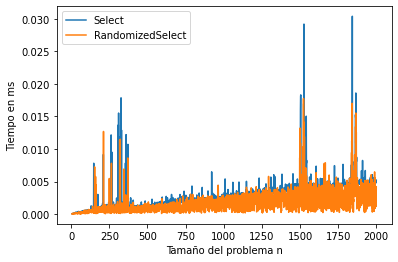

In [313]:
import matplotlib.pyplot as plt
import datetime
import random
import timeit

x,y,y1 = [],[],[]

for n in range(5,2001):

  a = random.sample(range(1, 2002), n)
  b = a # copia del arreglo aleatorio

  select_T = timeit.repeat(setup="from __main__ import select", stmt=f"select({a},0,{len(a)-1},1)", repeat=1, number=1)
  randomized_T = timeit.repeat(setup="from __main__ import randomized_select", stmt=f"randomized_select({b},0,{len(b)-1},1)", repeat=1, number=1)

  x.append(n)
  y.append(select_T)
  y1.append(randomized_T)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select", "RandomizedSelect"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 5.1.3 Análisis de resultados
Como podemos ver en el gráfico, ambos algoritmos muestran un comportamiento similar, pero en general, **RandomizedSelect** demuestra ser mas rápido que **Select**, ya que su curva se suele mantener bajo la del tiempo de ejecución de **Select**. Esto creemos que se puede deber a que **Select** tarda un tiempo extra al utilizar **PivotSelection**, ya que este último recursivamente calcula la mediana de las medianas de sub-arreglos, y para esto utiliza **InsertionSort**, por lo que a pesar de haber elegido un buen pivote, se gasta mucho mas tiempo durante la ejecución de los otros algoritmos.